In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv('USCorporateDefault.csv')
df = df.dropna()
print(df.shape)
print(list(df.columns))

(4000, 8)
['Firm ID', 'Year', 'Default', 'WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA']


In [3]:
df.head()

,Firm ID,Year,Default,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
0,3723,2012,1,0.24,0.06,0.03,1.83,0.27
1,1252,2014,0,0.42,-0.06,0.00,1.28,0.18
2,2188,2020,0,0.34,0.28,0.04,0.27,0.26
3,514,2014,0,0.09,0.20,0.05,0.94,0.14
4,3489,2014,0,0.19,-0.11,0.01,0.85,0.08


In [4]:
df.drop(['Firm ID','Year'], axis=1, inplace=True)

In [5]:
df['Default'].value_counts()

0    3549
1     451
Name: Default, dtype: int64

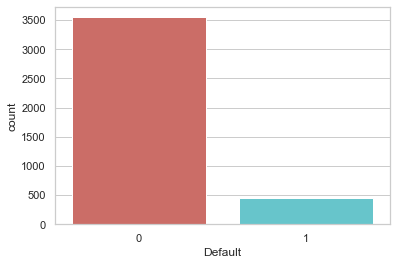

<Figure size 432x288 with 0 Axes>

In [6]:
sns.countplot(x='Default', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [7]:
count_no_default = len(df[df['Default']==0])
count_default = len(df[df['Default']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("percentage of no default is", pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print("percentage of default", pct_of_default*100)

percentage of no default is 88.725
percentage of default 11.275


In [8]:
df.groupby('Default').mean()

,WC/TA,RE/TA,EBIT/TA,ME/TL,S/TA
Default,,,,,
0,0.215500,0.100138,0.025365,0.689276,0.208755
1,0.220443,-0.020710,0.034745,1.597406,0.201441


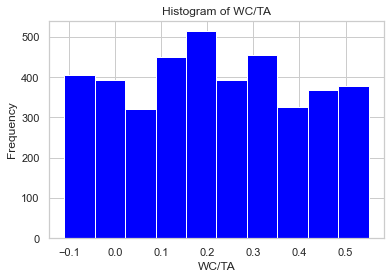

In [9]:
%matplotlib inline
df['WC/TA'].hist(color="blue")
plt.title('Histogram of WC/TA')
plt.xlabel('WC/TA')
plt.ylabel('Frequency')
plt.savefig('hist_WC_TA')

In [10]:
df['WC/TA'].describe()

count    4000.000000
mean        0.216057
std         0.186584
min        -0.110000
25%         0.060000
50%         0.210000
75%         0.370000
max         0.550000
Name: WC/TA, dtype: float64

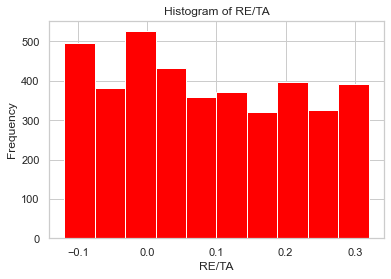

In [11]:
df['RE/TA'].hist(color="red")
plt.title('Histogram of RE/TA')
plt.xlabel('RE/TA')
plt.ylabel('Frequency')
plt.savefig('hist_RE_TA')

In [12]:
df['RE/TA'].describe()

count    4000.000000
mean        0.086512
std         0.129356
min        -0.120000
25%        -0.020000
50%         0.070000
75%         0.200000
max         0.320000
Name: RE/TA, dtype: float64

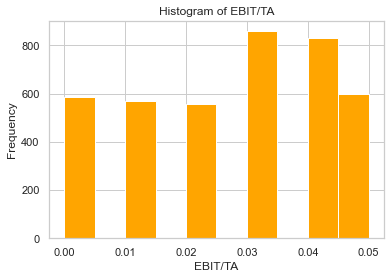

In [13]:
df['EBIT/TA'].hist(color="orange")
plt.title('Histogram of EBIT/TA')
plt.xlabel('EBIT/TA')
plt.ylabel('Frequency')
plt.savefig('hist_EBIT_TA')

In [14]:
df['EBIT/TA'].describe()

count    4000.000000
mean        0.026423
std         0.016462
min         0.000000
25%         0.010000
50%         0.030000
75%         0.040000
max         0.050000
Name: EBIT/TA, dtype: float64

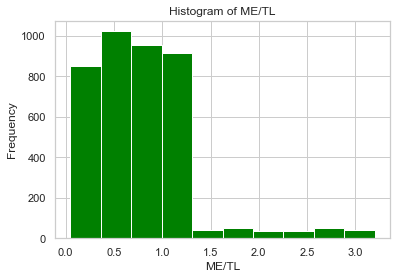

In [15]:
df['ME/TL'].hist(color="green")
plt.title('Histogram of ME/TL')
plt.xlabel('ME/TL')
plt.ylabel('Frequency')
plt.savefig('hist_ME_TL')

In [16]:
df['ME/TL'].describe()

count    4000.000000
mean        0.791668
std         0.533329
min         0.050000
25%         0.410000
50%         0.730000
75%         1.060000
max         3.200000
Name: ME/TL, dtype: float64

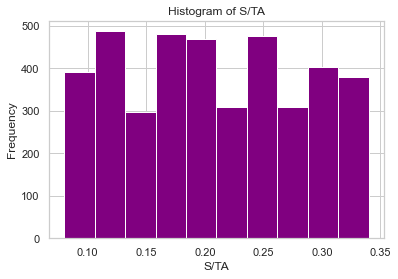

In [17]:
df['S/TA'].hist(color="purple")
plt.title('Histogram of S/TA')
plt.xlabel('S/TA')
plt.ylabel('Frequency')
plt.savefig('hist_S_TA')

In [18]:
df['S/TA'].describe()

count    4000.000000
mean        0.207930
std         0.075232
min         0.080000
25%         0.140000
50%         0.210000
75%         0.270000
max         0.340000
Name: S/TA, dtype: float64

In [19]:
X = df.loc[:, df.columns != 'Default']
y = df.loc[:, df.columns == 'Default']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no default in oversampled data",len(os_data_y[os_data_y['Default']==0]))
print("Number of default",len(os_data_y[os_data_y['Default']==1]))
print("Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y['Default']==0])/len(os_data_X))
print("Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['Default']==1])/len(os_data_X))

length of oversampled data is  4756
Number of no default in oversampled data 2378
Number of default 2378
Proportion of no default data in oversampled data is  0.5
Proportion of default data in oversampled data is  0.5


In [20]:
df_vars = df.columns.values.tolist()
y=['Default']
X=[i for i in df_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 5)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True]
[1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [21]:
cols=['WC/TA', 'RE/TA', 'EBIT/TA', 'ME/TL', 'S/TA'] 

X=os_data_X[cols]
y=os_data_y['Default']

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X1 = np.array(X)
y1 = np.array(y)

lda = LinearDiscriminantAnalysis()
lda.fit(X1, y1)

df11=pd.DataFrame(lda.coef_[0].reshape(-1,1),X.columns,columns=["Weight"])
df12=pd.DataFrame(lda.intercept_[0].reshape(-1,1),["Bias"],columns=["Weight"])
resulty = pd.concat([df12, df11], axis=0)
resulty

,Weight
Bias,-3.127620
WC/TA,0.345645
RE/TA,-12.713124
EBIT/TA,61.915190
ME/TL,1.866943
S/TA,-2.179509


In [23]:
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
lda = LinearDiscriminantAnalysis()

X_train1 = np.array(X_train)
y_train1 = np.array(y_train)

lda.fit(X_train1, y_train1)

df11=pd.DataFrame(lda.coef_[0].reshape(-1,1),X.columns,columns=["Weight"])
df12=pd.DataFrame(lda.intercept_[0].reshape(-1,1),["Bias"],columns=["Weight"])
params = pd.concat([df12, df11], axis=0)
params

,Weight
Bias,-3.025681
WC/TA,-0.059189
RE/TA,-12.764690
EBIT/TA,61.109406
ME/TL,1.864436
S/TA,-1.988112


In [24]:
from sklearn.metrics import accuracy_score

X_test1 = np.array(X_test)
y_test1 = np.array(y_test)

y_pred = lda.predict(X_test1)

print('Accuracy of Linear Discriminant Analysis Model on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of Linear Discriminant Analysis Model on test set: 0.82


In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[641 144]
 [135 650]]


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       785
           1       0.82      0.83      0.82       785

    accuracy                           0.82      1570
   macro avg       0.82      0.82      0.82      1570
weighted avg       0.82      0.82      0.82      1570



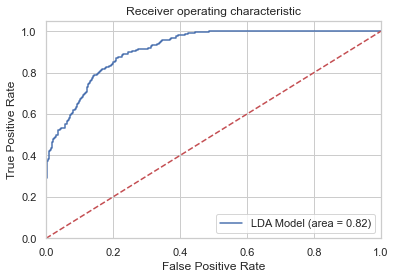

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

lda_roc_auc = roc_auc_score(y_test, lda.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lda.predict_proba(X_test1)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='LDA Model (area = %0.2f)' % lda_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LDA_ROC')

plt.show()